In [107]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1

In [108]:
def generate_spikes(rate, bins):
    spike_train = np.random.binomial(1, rate / bins, bins)
    return spike_train

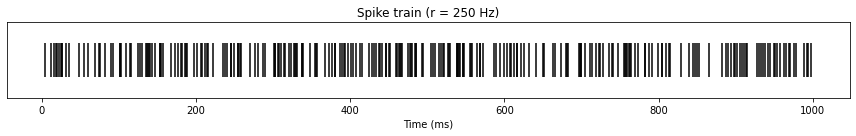

In [168]:
r = 250 # Firing rate = 250 Hz
T = 1000 # Total time = 1 s = 1000 ms

S = generate_spikes(r, T)

plt.figure(figsize=(12, 2))
plt.eventplot(np.where(S == 1), color='k')
plt.yticks([])
plt.title('Spike train (r = 250 Hz)')
plt.xlabel('Time (ms)')
plt.tight_layout()

plt.savefig('1.1.pdf')
plt.show()


### 1.2

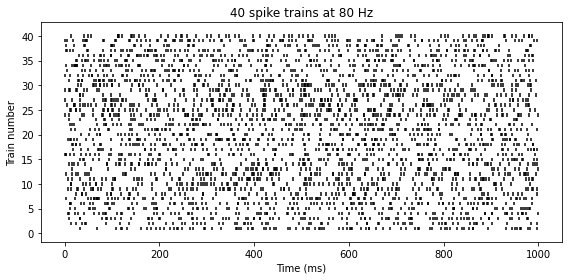

In [169]:
r = 80
T = 1000
trains = []

for i in range(300):
    S = generate_spikes(r, T)
    trains.append(S)

# plot 40 of the trains in a raster plot
plt.figure(figsize=(8, 4))
for i, train in enumerate(trains[:40]):
    plt.eventplot(np.where(train == 1), lineoffsets=i+1, linelengths=0.7, color='k')

plt.title('40 spike trains at 80 Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Train number')
plt.tight_layout()

plt.savefig('1.2.1.pdf')
plt.show()

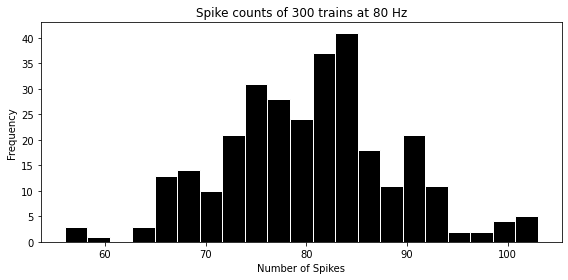

In [171]:
spike_counts = np.sum(trains, axis=1)

plt.figure(figsize=(8, 4))
plt.hist(spike_counts, bins=21, edgecolor='white', color='k')
plt.title('Spike counts of 300 trains at 80 Hz')
plt.xlabel('Number of Spikes')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('1.2.2.pdf')
plt.show()

### 1.3

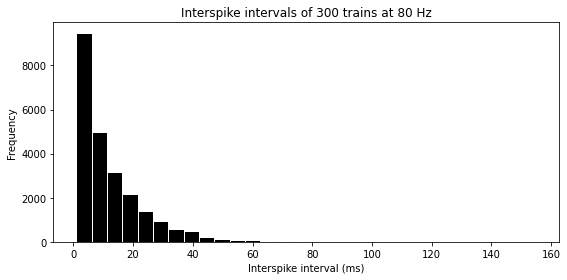

In [172]:
intervals = np.array([])
for train in trains: 
    spikes = np.where(train == 1)[0]
    intervals = np.concatenate((intervals, np.diff(spikes)))

plt.figure(figsize=(8, 4))
plt.hist(intervals, bins=30, color='k', edgecolor='w')
plt.title('Interspike intervals of 300 trains at 80 Hz')
plt.xlabel('Interspike interval (ms)')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('1.3.pdf')
plt.show()

In [118]:
print(np.mean(intervals) / np.std(intervals))


1.047428653142974


Coefficient of variance > 1 means that the spike trains are less regular than a poisson process.

### 1.4 Extra Point

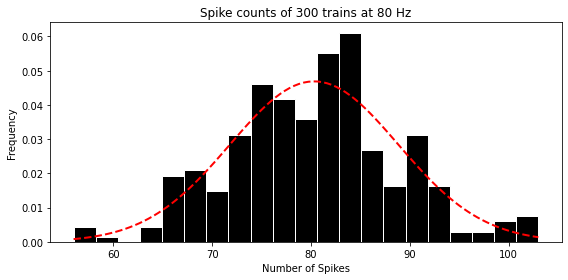

In [173]:
from scipy.stats import norm

x = np.linspace(min(spike_counts), max(spike_counts), 100)
y = norm.pdf(x, np.mean(spike_counts), np.std(spike_counts))

plt.figure(figsize=(8, 4))
plt.hist(spike_counts, bins=21, color='k', edgecolor='w', density=True)
plt.plot(x, y, 'r--', linewidth=2)
plt.title('Spike counts of 300 trains at 80 Hz')
plt.xlabel('Number of Spikes')
plt.ylabel('Frequency')
plt.tight_layout()


plt.savefig('1.4.pdf')
plt.show()

### Overlay normal distribution, take the error w/r/t the normal

### 2.1

In [123]:
from scipy.io import loadmat
data = loadmat('simdata.mat')

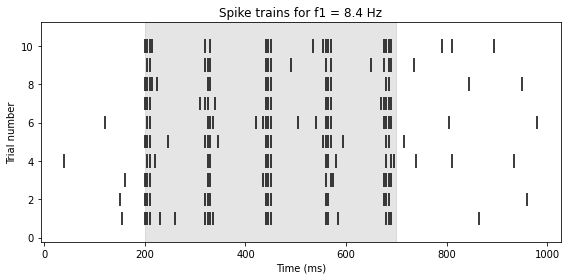

In [175]:
# spike trains for first stimulus
stimulus1 = data['spt'][0][0]

plt.figure(figsize=(8, 4))
for i in range(stimulus1.shape[0]):
    plt.eventplot(np.where(stimulus1[i] == 1)[0] * 5, color='k',
                  lineoffsets=i+1, linelengths=0.7)

plt.axvspan(200, 700, color='k', alpha=0.1)
plt.title('Spike trains for f1 = 8.4 Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Trial number')
plt.tight_layout()

plt.savefig('2.1.pdf')
plt.show()

In [148]:
data['f1']

array([[ 8.4, 12. , 15.7, 19.6, 23.6, 25.9, 27.7, 35. ]])

### 2.2

In [149]:
counts = []
for train in stimulus1:
    counts.append(np.sum(train[40: 140]))

mean = np.mean(counts)
var = np.var(counts)

# print mean and variance nicely
print(f"Mean: {mean}, Variance: {var}")
print(f"Mean Firing Rate: {mean * 2} Hz")

Mean: 16.5, Variance: 3.25
Mean Firing Rate: 33.0 Hz


### 2.3

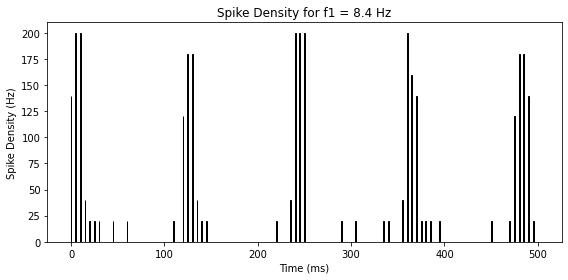

In [176]:
interval1 = stimulus1[:, 40:141].mean(axis=0) / 0.005
x = np.linspace(0, 500, 101)

plt.figure(figsize=(8, 4))
plt.bar(x, interval1, edgecolor='k')
plt.title('Spike Density for f1 = 8.4 Hz')
plt.xlabel('Time (ms)')
plt.ylabel('Spike Density (Hz)')
plt.tight_layout()

plt.savefig('2.3.pdf')
plt.show()


### 2.4

In [241]:
print(data['spt'][0][].shape)

(10, 201)


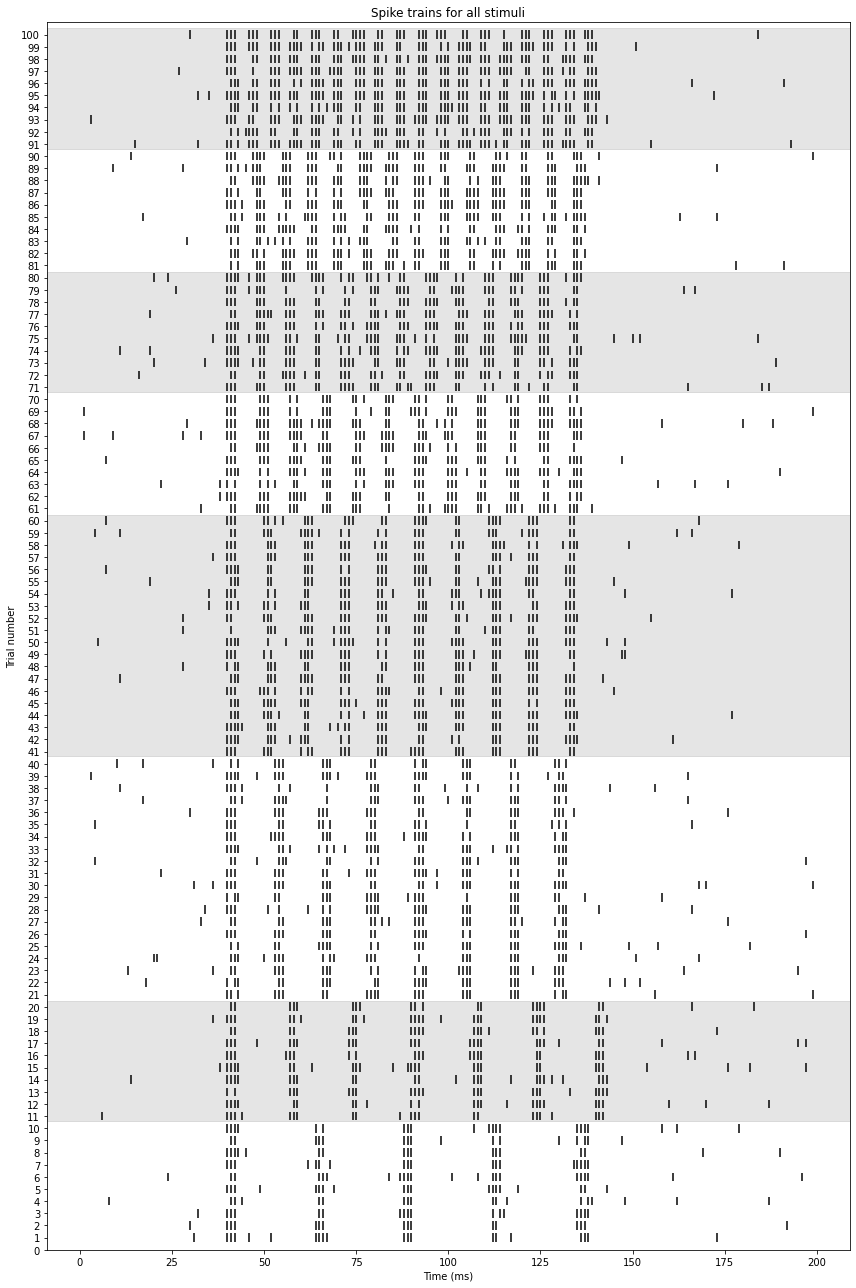

In [251]:
# plot a raster plot for all trials of all stimuli 
plt.figure(figsize=(12, 18))

all_trials = np.concatenate(data['spt'][0], axis=0)
for i in range(all_trials.shape[0]):
    spikes = np.where(all_trials[i] == 1)[0]
    plt.eventplot(spikes, lineoffsets=i+1, linelengths=0.7, color='k')

plt.title('Spike trains for all stimuli')
plt.xlabel('Time (ms)')
plt.ylabel('Trial number')
plt.ylim(0, 101)
plt.yticks(np.linspace(0, 100, 101))

# use axhspan to highlight the following alternating intervals
plt.axhspan(10.6, 20.5, color='k', alpha=0.1)
plt.axhspan(40.6, 60.5, color='k', alpha=0.1)
plt.axhspan(70.6, 80.5, color='k', alpha=0.1)
plt.axhspan(90.6, 100.5, color='k', alpha=0.1)

plt.tight_layout()
plt.savefig('2.4.1.pdf')
plt.show()

8.4


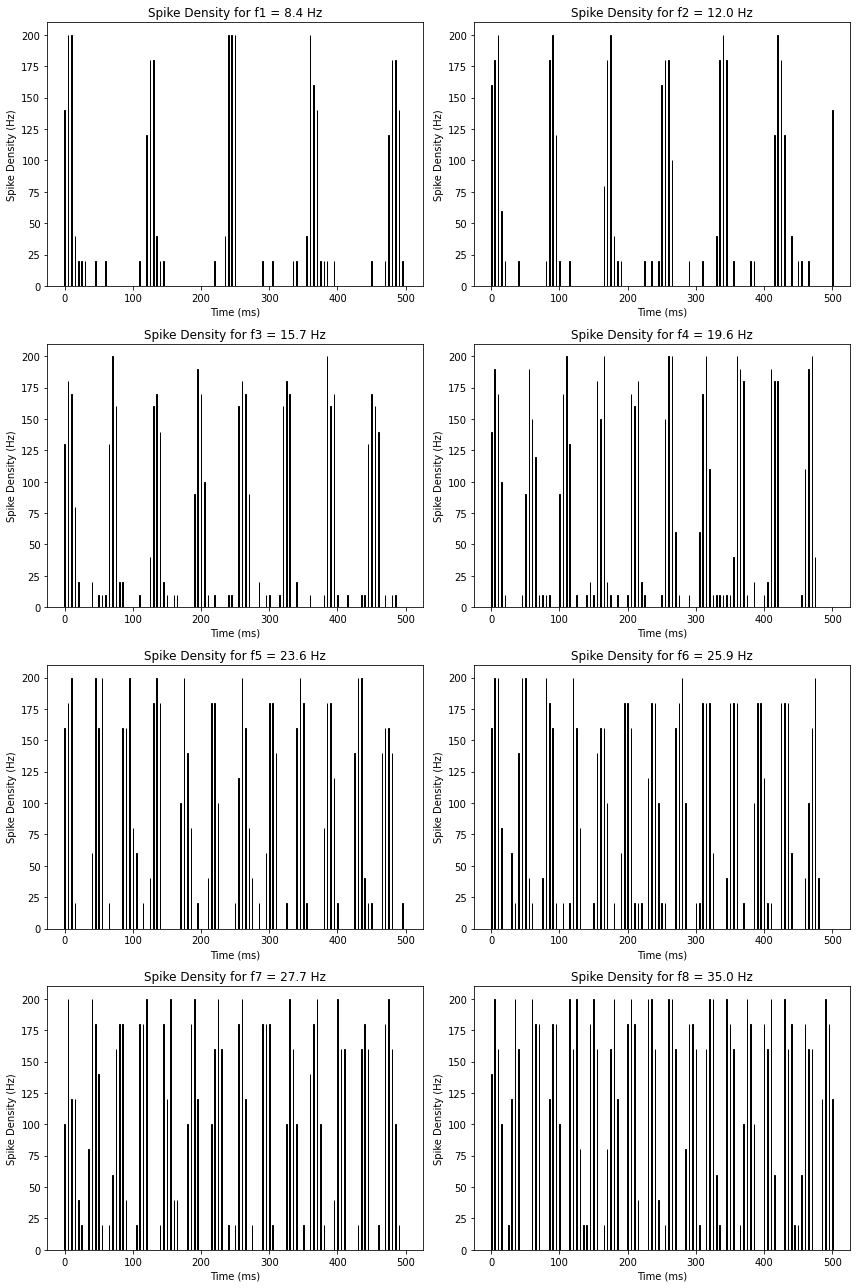

In [257]:
# plot spike density plots for each of the 8 stimuli
print(data['f1'][0][0])

plt.figure(figsize=(12, 18))
x = np.linspace(0, 500, 101)
for i in range(8):
    interval = data['spt'][0][i][:, 40:141].mean(axis=0) / 0.005
    plt.subplot(4, 2, i+1)
    plt.bar(x, interval, edgecolor='k')
    plt.title(f'Spike Density for f{i+1} = {data["f1"][0][i]} Hz')
    plt.xlabel('Time (ms)')
    plt.ylabel('Spike Density (Hz)')

plt.tight_layout()
plt.savefig('2.4.2.pdf')
plt.show()

### 2.5

f1: Mean: 16.5, Variance: 3.25
f2: Mean: 19.9, Variance: 2.09
f3: Mean: 23.6, Variance: 3.84
f4: Mean: 29.9, Variance: 2.49
f5: Mean: 35.6, Variance: 6.24
f6: Mean: 39.5, Variance: 8.65
f7: Mean: 41.8, Variance: 3.56
f8: Mean: 52.9, Variance: 11.1
[33.0, 39.8, 47.2, 59.8, 71.2, 79.0, 83.6, 105.8]


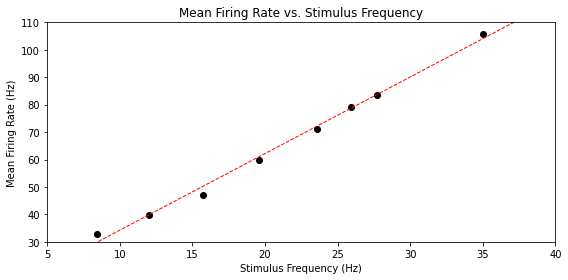

In [331]:
firing_rates = []

for i in range(8):
    trains = data['spt'][0][i][:, 40:141]
    counts = np.sum(trains, axis=1)
    mean = np.mean(counts)
    var = np.var(counts)
    print(f"f{i+1}: Mean: {mean}, Variance: {var:.3}")
    firing_rates.append(mean * 2)

print(firing_rates)

plt.figure(figsize=(8, 4))
plt.plot(data['f1'][0], firing_rates, 'ko')

y = np.polyfit(data['f1'][0], firing_rates, 1)
x_values = np.linspace(0, 40, 100)
y_values = np.polyval(y, x_values)
plt.plot(x_values, y_values, 'r--', linewidth=1)

plt.title('Mean Firing Rate vs. Stimulus Frequency')
plt.xlabel('Stimulus Frequency (Hz)')
plt.ylabel('Mean Firing Rate (Hz)')
plt.xlim(5, 40)
plt.ylim(30, 110)

plt.tight_layout()
plt.savefig('2.5.pdf')
plt.show()


In [316]:
for stimuli in data['spt'][0]:
    print(len(stimuli))

    

10
10
20
20
10
10
10
10


### 2.5

# Part 2

### 1.1

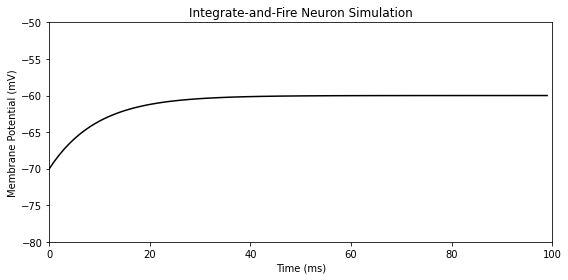

In [431]:
I = 1       # nA
C = 1       # nF
gL = 0.1    # uS
E_L = -70   # mV

V_0 = E_L   # initial condition 
dt = 1    # delta t in ms
T = 100     # total time in ms

def euler(I, C, gL, E_L, V_0, dt, T):
    V = [V_0]
    for t in range(1, T):
        dV = (gL * (E_L - V[t-1]) + I) * dt / C
        V.append(V[t-1] + dV)

    plt.figure(figsize=(8, 4))
    plt.plot(V, 'k')
    plt.xlim(0, T)
    plt.ylim(-80, -50)
    plt.title('Integrate-and-Fire Neuron Simulation')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.tight_layout()
    plt.savefig('3.1.pdf')
    plt.show()
    
    return V

# simulate the membrane potential using the Euler method
V = euler(I, C, gL, E_L, V_0, dt, T)


### 1.2

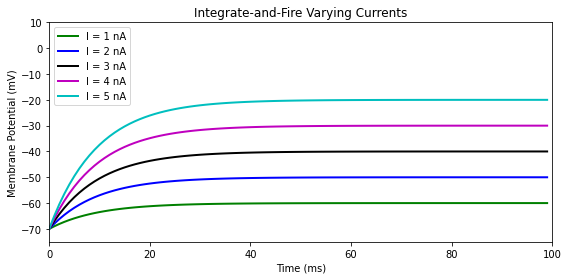

In [338]:
def euler2(I, C, gL, E_L, V_0, dt, T):
    plt.figure(figsize=(8, 4))
    colors = ['r', 'g', 'b', 'k', 'm', 'c']
    
    for i in range(1, I):
        V = [V_0]
        for t in range(1, T):
            dV = (gL * (E_L - V[t-1]) + i) * dt / C
            V.append(V[t-1] + dV)
        plt.plot(V, color=colors[i % 6], label=f'I = {i} nA', linewidth=2)
    
    plt.xlim(0, T)
    plt.ylim(-75, 10)
    plt.title('Integrate-and-Fire Varying Currents')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('3.2.pdf')
    plt.show()

    return V

# simulate the membrane potential using the Euler method
V = euler2(6, C, gL, E_L, V_0, dt, T)

### 1.3 Extra Point

### 1.4

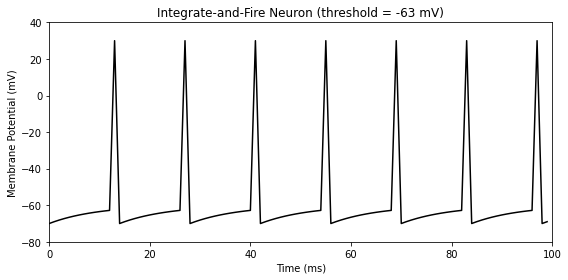

In [430]:
V_th = -63 # spike threshold in mV
V_max = 30 # spike voltage in mV

def w_spike(I, C, gL, E_L, V_0, dt, T, V_th, plot=True):
    V = [V_0]
    count = 0
    for t in range(1, T):
        if V[t-1] >= V_max:
            V.append(E_L)
            continue
        
        if V[t-1] > V_th:
            V.append(V_max)
            count += 1
            continue
        
        dV = (gL * (E_L - V[t-1]) + I) * dt / C
        V.append(V[t-1] + dV)

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(V, 'k')
        plt.xlim(0, T)
        plt.ylim(-80, 40)
        plt.title('Integrate-and-Fire Neuron (threshold = -63 mV)')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.tight_layout()
        plt.savefig('3.4.pdf')
        plt.show()
    
    return count

count = w_spike(1, C, gL, E_L, V_0, dt, T, V_th)

### 1.5

First spike at 0.7007007007007007 nA


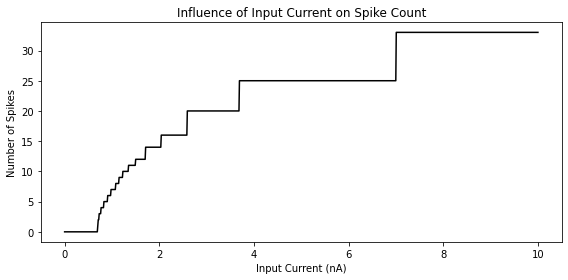

In [429]:
x = np.linspace(0, 10, 1000)
counts = [w_spike(i, C, gL, E_L, V_0, dt, T, V_th, plot=False) for i in x]

for i, v in enumerate(counts):
    if v == 1:
        print(f"First spike at {x[i]} nA")
        break

plt.figure(figsize=(8, 4))
plt.plot(x, counts, 'k')
plt.title('Influence of Input Current on Spike Count')
plt.xlabel('Input Current (nA)')
plt.ylabel('Number of Spikes')
plt.tight_layout()
plt.savefig('3.5.pdf')
plt.show()

### 1.6

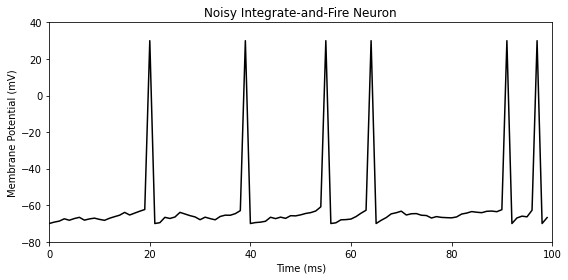

In [428]:
sigma = 1 # amount of noise
def w_noise(I, C, gL, E_L, V_0, dt, T, V_th, sigma, plot=True):
    V = [V_0]
    spikes = np.zeros(T)
    
    for t in range(1, T):
        if V[t-1] >= V_max:
            V.append(E_L)
            continue
        
        if V[t-1] > V_th:
            V.append(V_max)
            spikes[t] = 1
            continue
        
        dV = (gL * (E_L - V[t-1]) + I) * dt / C
        mu = np.random.normal(0, 1)
        noise = sigma * mu * np.sqrt(dt)
        V.append(V[t-1] + dV + noise)
    
    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(V, color='k')
        plt.xlim(0, T)
        plt.ylim(-80, 40)
        plt.title('Noisy Integrate-and-Fire Neuron')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')

        plt.tight_layout()
        plt.savefig('3.6.pdf')
        plt.show()
    
    return spikes

spikes = w_noise(1, C, gL, E_L, V_0, dt, T, V_th, sigma)

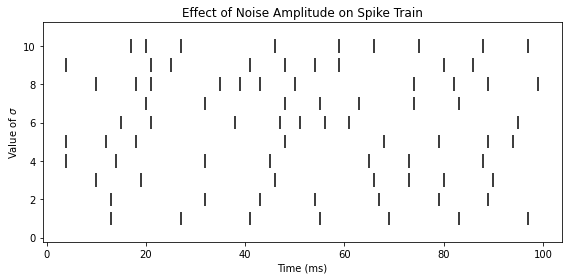

In [424]:
x = np.linspace(0, 5, 10)
spikes = [w_noise(1, C, gL, E_L, V_0, dt, T, V_th, i, plot=False) for i in x]

plt.figure(figsize=(8, 4))
for i, spike in enumerate(spikes):
    plt.eventplot(np.where(spike == 1)[0], color='k', lineoffsets=i+1, linelengths=0.7)


plt.title('Effect of Noise Amplitude on Spike Train')
plt.xlabel('Time (ms)')
plt.ylabel(r'Value of $\sigma$')
plt.tight_layout()
plt.savefig('3.6.2.pdf')
plt.show()

### 1.7

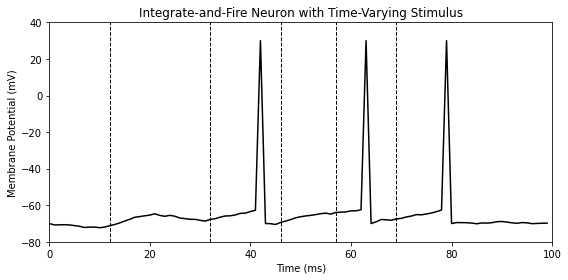

In [618]:
def w_current(I, C, gL, E_L, V_0, dt, T, V_th, sigma, plot=True):
    V = [V_0]
    spikes = np.zeros(T)
    
    I = np.zeros(T)
    S = np.random.binomial(1, .1 , T)
    
    for i in range(T):
        if S[i] == 1: 
            I[i:i+10] = 1

    for t in range(1, T):
        if V[t-1] >= V_max:
            V.append(E_L)
            continue
        
        if V[t-1] > V_th:
            V.append(V_max)
            spikes[t] = 1
            continue
        
        dV = (gL * (E_L - V[t-1]) + I[t]) * C / dt
        mu = np.random.normal(0, 1)
        noise = sigma * mu * np.sqrt(dt)
        V.append(V[t-1] + dV + noise)
    
    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(V, color='k')

        # axvspan to highlight the stimulus using I
        for i in range(T):
            if S[i] == 1:
                plt.vlines(i, -80, 40, color='k', linestyle='--', linewidth=1)

        plt.xlim(0, T)
        plt.ylim(-80, 40)
        plt.title('Integrate-and-Fire Neuron with Time-Varying Stimulus')
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')

        plt.savefig('3.7.pdf')
        plt.tight_layout()
        plt.show()

    return None

w_current(I, C, gL, E_L, V_0, dt, T, V_th, .3)

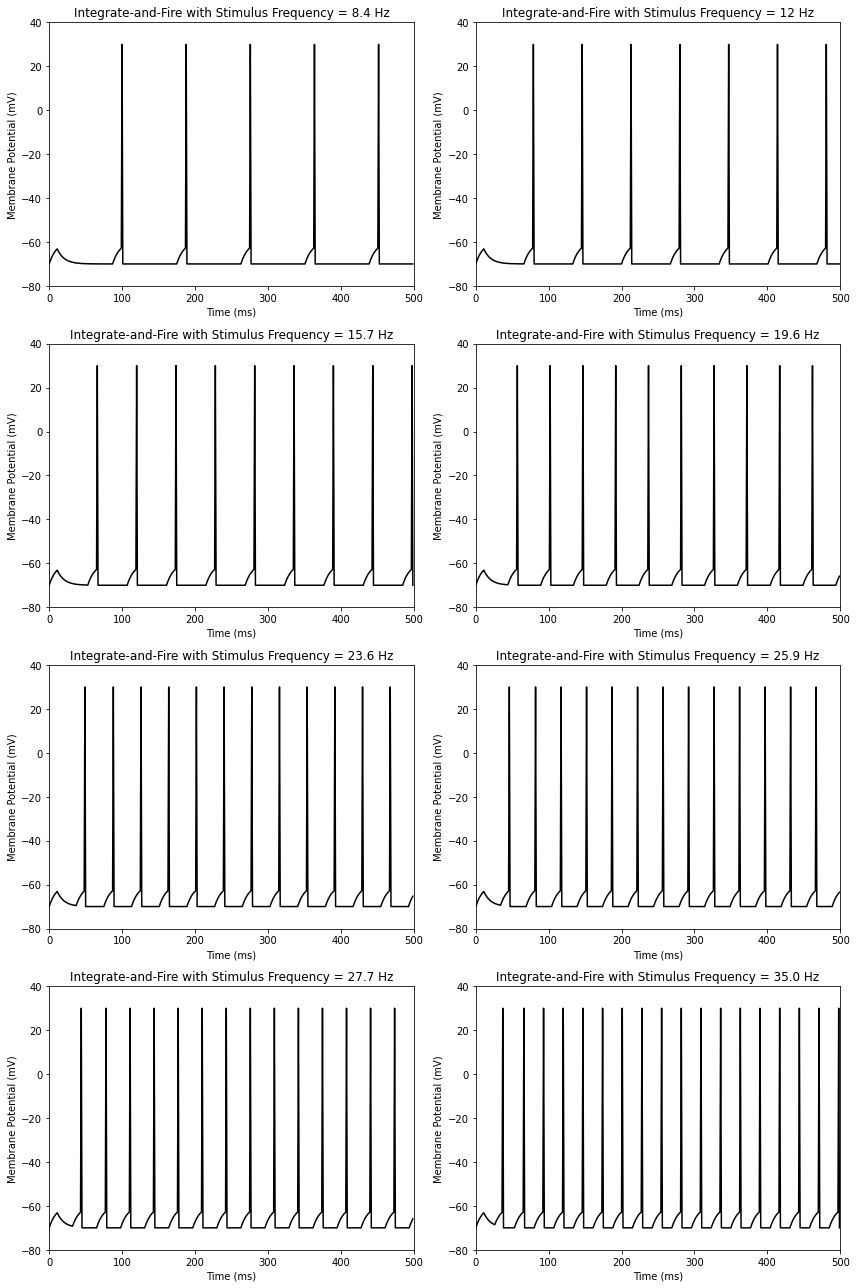

In [548]:
def w_freq(C, gL, E_L, V_0, dt, T, V_th, sigma):
    plt.figure(figsize=(12, 18))

    Fs = [8.4, 12, 15.7, 19.6, 23.6, 25.9, 27.7, 35.0]

    for idx, F in enumerate(Fs): 
        V = [V_0]
        spikes = np.zeros(T)
        
        I = np.zeros(T)
        S = np.zeros(T)

        # create equally spaced spikes of 10 time steps after step 
        step = int(np.ceil(T / (F * .5 + 1.5)))
        S[::step] = 1
        
        for i in range(T):
            if S[i] == 1: 
                I[i:i+12] = 1.0

        for t in range(1, T):
            if V[t-1] >= V_max:
                V.append(E_L)
                continue
            
            if V[t-1] > V_th:
                V.append(V_max)
                spikes[t] = 1
                continue
            
            dV = (gL * (E_L - V[t-1]) + I[t]) * C / dt
            mu = np.random.normal(0, 1)
            noise = sigma * mu * np.sqrt(dt)
            V.append(V[t-1] + dV + noise)
        
        plt.subplot(4, 2, idx+1)
        plt.plot(V, color='k')
        plt.xlim(0, T)
        plt.ylim(-80, 40)
        plt.title(f'Integrate-and-Fire with Stimulus Frequency = {F} Hz') 
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')

    plt.tight_layout()
    plt.savefig('3.8.pdf')
    plt.show()

    return None


w_freq(C, gL, E_L, V_0, dt, 500, V_th, 0)

### Extra Point 

### 2.1

First spike at 110.60000000000001 ms
100th spike at 403.90000000000003 ms


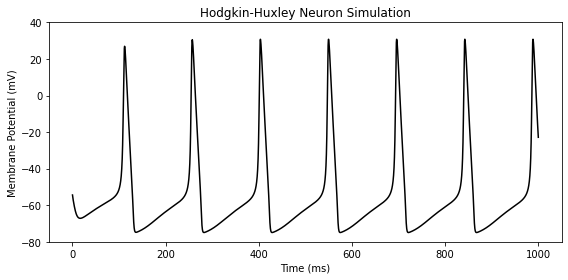

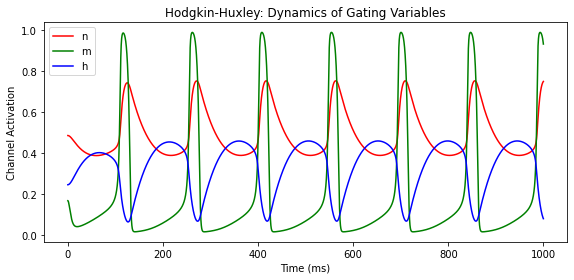

In [461]:
def hodgkin_huxley(
        I    = 10,    # initial input current   nA
        C    = 1,     # membrain capacitance    nF/cm^2
        g_L   = .3,   # membrane conductance    uS/cm^2
        E_L  = -54.4, # resting potential       mV
        
        # ion channel parameters
        g_K  = 36,    # max K conductance       mS/cm^2
        E_K  = -77,   # resting K potential     mV
        g_Na = 120,   # max Na conductance      mS/cm^2
        E_Na = 50,    # resting Na potential    mV  
        
        # simulation parameters
        dt   = .1,    # time step size          ms
        T    = 1000,  # total time              ms         
        
        # ion channel variables
        n_0 = .486,   # initial n
        m_0 = .168,   # initial m
        h_0 = .246,   # initial h
    ):

    T = int(T / dt) # convert T to time steps
    x = np.linspace(0, T * dt, T)

    Vs = np.zeros(T)
    ns = np.zeros(T)
    ms = np.zeros(T)
    hs = np.zeros(T)

    Vs[0] = E_L
    ns[0] = n_0
    ms[0] = m_0
    hs[0] = h_0

    count = 0

    for t in range(1, T):
        V = Vs[t-1]
        n = ns[t-1]
        m = ms[t-1]
        h = hs[t-1]

        I_L = g_L * (E_L - V)
        I_K = g_K * n**4 * (E_K - V)
        I_Na = g_Na * m**3 * h * (E_Na - V)
        dV = (I_L + I_K + I_Na + I) * dt / C
        
        dn = ((alpha('n', V) * (1 - n)) - (beta('n', V) * n)) * dt
        dm = ((alpha('m', V) * (1 - m)) - (beta('m', V) * m)) * dt
        dh = ((alpha('h', V) * (1 - h)) - (beta('h', V) * h)) * dt

        Vs[t] = Vs[t-1] + dV * dt
        ns[t] = ns[t-1] + dn * dt
        ms[t] = ms[t-1] + dm * dt
        hs[t] = hs[t-1] + dh * dt

        if count < 100 and Vs[t] > 20:
            count += 1
            if count == 1:
                print(f"First spike at {t * dt} ms")
            if count == 100:
                print(f"100th spike at {t * dt} ms")
            

        

    plt.figure(figsize=(8, 4))
    plt.plot(x, Vs, color='k')
    plt.ylim(-80, 40)
    plt.title('Hodgkin-Huxley Neuron Simulation')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.tight_layout()
    plt.savefig('4.1.1.pdf')
    plt.show()

    plt.figure(figsize=(8.077, 4))
    plt.plot(x, ns, color='r', label='n')
    plt.plot(x, ms, color='g', label='m')
    plt.plot(x, hs, color='b', label='h')
    plt.title('Hodgkin-Huxley: Dynamics of Gating Variables')
    plt.xlabel('Time (ms)')
    plt.ylabel('Channel Activation')
    plt.legend()
    plt.tight_layout()
    plt.savefig('4.1.2.pdf')
    plt.show()

    return None

def alpha(var, V):
    if var == 'n':
        return (.01 * (V + 55)) / (1 - np.exp(-.1 * (V + 55)))
    elif var == 'm':
        return (.1 * (V + 40)) / (1 - np.exp(-.1 * (V + 40)))
    elif var == 'h':
        return .07 * np.exp(-.05 * (V + 65))

def beta(var, V):
    if var == 'n':
        return .125 * np.exp(-.0125 * (V + 65))
    elif var == 'm':
        return 4 * np.exp(-.0556 * (V + 65))
    elif var == 'h':
        return 1 / (1 + np.exp(-.1 * (V + 35)))

def channel_step(x, var, V, dt):
    return  ((alpha(var, V) * (1 - x)) - (beta(var, V) * x)) * dt

hodgkin_huxley()

First spike at 955.8000000000001 ms
100th spike at 1274.1000000000001 ms


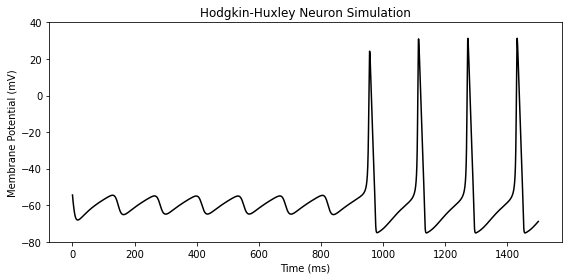

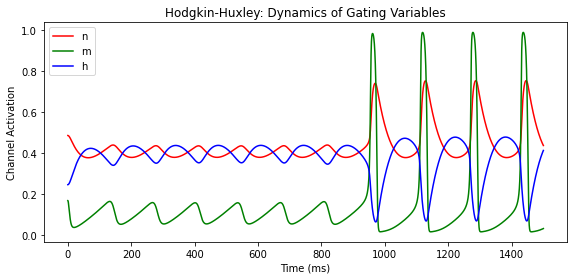

In [462]:
def hodgkin_huxley2(
        I    = 10,    # initial input current   nA
        C    = 1,     # membrain capacitance    nF/cm^2
        g_L   = .3,   # membrane conductance    uS/cm^2
        E_L  = -54.4, # resting potential       mV
        
        # ion channel parameters
        g_K  = 36,    # max K conductance       mS/cm^2
        E_K  = -77,   # resting K potential     mV
        g_Na = 120,   # max Na conductance      mS/cm^2
        E_Na = 50,    # resting Na potential    mV  
        
        # simulation parameters
        dt   = .1,    # time step size          ms
        T    = 1000,  # total time              ms         
        
        # ion channel variables
        n_0 = .486,   # initial n
        m_0 = .168,   # initial m
        h_0 = .246,   # initial h
    ):

    T = int(T / dt) # convert T to time steps
    x = np.linspace(0, T * dt, T)

    Vs = np.zeros(T)
    ns = np.zeros(T)
    ms = np.zeros(T)
    hs = np.zeros(T)

    Vs[0] = E_L
    ns[0] = n_0
    ms[0] = m_0
    hs[0] = h_0

    count = 0

    for t in range(1, T):
        V = Vs[t-1]
        n = ns[t-1]
        m = ms[t-1]
        h = hs[t-1]

        I_L = g_L * (E_L - V)
        I_K = g_K * n**4 * (E_K - V)
        I_Na = g_Na * m**3 * h * (E_Na - V)
        dV = (I_L + I_K + I_Na + I) * dt / C
        
        dn = ((alpha('n', V) * (1 - n)) - (beta('n', V) * n)) * dt
        dm = ((alpha('m', V) * (1 - m)) - (beta('m', V) * m)) * dt
        dh = ((alpha('h', V) * (1 - h)) - (beta('h', V) * h)) * dt

        Vs[t] = Vs[t-1] + dV * dt
        ns[t] = ns[t-1] + dn * dt
        ms[t] = ms[t-1] + dm * dt
        hs[t] = hs[t-1] + dh * dt

        if count < 100 and Vs[t] > 20:
            count += 1
            if count == 1:
                print(f"First spike at {t * dt} ms")
            if count == 100:
                print(f"100th spike at {t * dt} ms")
            

        

    plt.figure(figsize=(8, 4))
    plt.plot(x, Vs, color='k')
    plt.ylim(-80, 40)
    plt.title('Hodgkin-Huxley Neuron Simulation')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.tight_layout()
    plt.savefig('4.1.3.pdf')
    plt.show()

    plt.figure(figsize=(8.077, 4))
    plt.plot(x, ns, color='r', label='n')
    plt.plot(x, ms, color='g', label='m')
    plt.plot(x, hs, color='b', label='h')
    plt.title('Hodgkin-Huxley: Dynamics of Gating Variables')
    plt.xlabel('Time (ms)')
    plt.ylabel('Channel Activation')
    plt.legend()
    plt.tight_layout()
    plt.savefig('4.1.4.pdf')
    plt.show()

    return None

hodgkin_huxley2(I=8.133, dt=.1, T=1500)